In [6]:
import numpy as np
import matplotlib.pyplot as plt

In [41]:
c = 3*10**8
L = 5 * 10**6 *10**3

In [42]:
def transfer_func(theta,f):
    
    fs = c/(2*np.pi*L)
    
    Tau = np.sinc((f/(2*fs))*(1-np.cos(theta))) * np.exp(-1j*(f/(2*fs))*(3+np.cos(theta))) + np.sinc((f/(2*fs))*(1+np.cos(theta))) * np.exp(-1j*(f/(2*fs))*(1+np.cos(theta)))
    return np.abs(Tau)

In [43]:
transfer_func(np.pi,0.001)

1.979342527118797

### Single-Arm Extension 

$$ \delta l (t_2) = \frac{L sin^2\theta \ \tau(cos \theta,f)}{2} \frac{M^{5/3} (\pi f)^{2/3}}{r} \left[ -2 (1+cos^2 i) \ cos(2 \psi) \ cos(2 \pi f) - 4 cosi \ sin(2\psi)\ sin(2 \pi f) \right]$$

We can consider the strain to be of order of magnitude $10^{-19}$ and $L \approx 10^9$


$$ \delta l (t_2) =  -[2 (1+cos^2 i) \ cos(2 \psi) \ cos(2 \pi f) - 4 cosi \ sin(2\psi)\ sin(2 \pi f)]*sin^2\theta * 10^{-10}$$

So the extension depends on the inclination angle i, the polarisation angle $\psi$ and the orientation of the arm $\theta$


In [47]:
f = 10**(-3)

In [92]:
def response(theta,i,Psi):

    dl = np.sin(theta)**2  * (-2*(1+np.cos(i)**2)*np.cos(2*Psi)*np.cos(2*np.pi*f)-4*np.cos(i)*np.sin(2*Psi)*np.sin(2*np.pi*f)) * 10**(-10)
    return dl

In [93]:
theta = np.pi/3
i = np.linspace(0,180,100)*np.pi/180

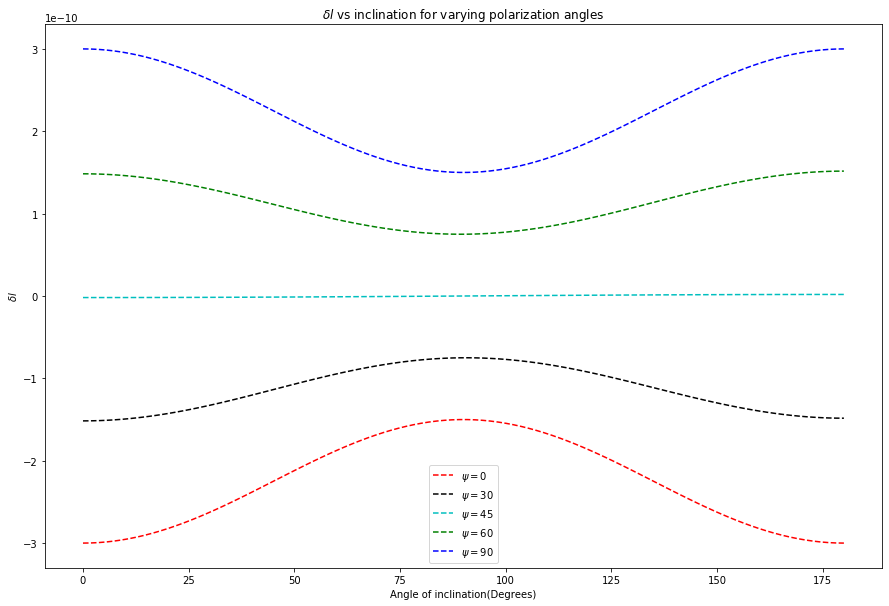

In [94]:
plt.figure(figsize=(15,10))
plt.plot(i*180/np.pi,response(theta,i,0),"r--",label="$\psi=0$")
plt.plot(i*180/np.pi,response(theta,i,30*np.pi/180),"k--",label="$\psi=30$")
plt.plot(i*180/np.pi,response(theta,i,45*np.pi/180),"c--",label="$\psi=45$")
plt.plot(i*180/np.pi,response(theta,i,60*np.pi/180),"g--",label="$\psi=60$")
plt.plot(i*180/np.pi,response(theta,i,90*np.pi/180),"b--",label="$\psi=90$")

plt.legend()
plt.xlabel("Angle of inclination(Degrees)")
plt.ylabel("$\delta l$")
plt.title("$\delta l$ vs inclination for varying polarization angles")
plt.savefig("responsevsinclination.pdf")

In [95]:
i = np.pi/3
theta = np.linspace(0,180,100)*np.pi/180


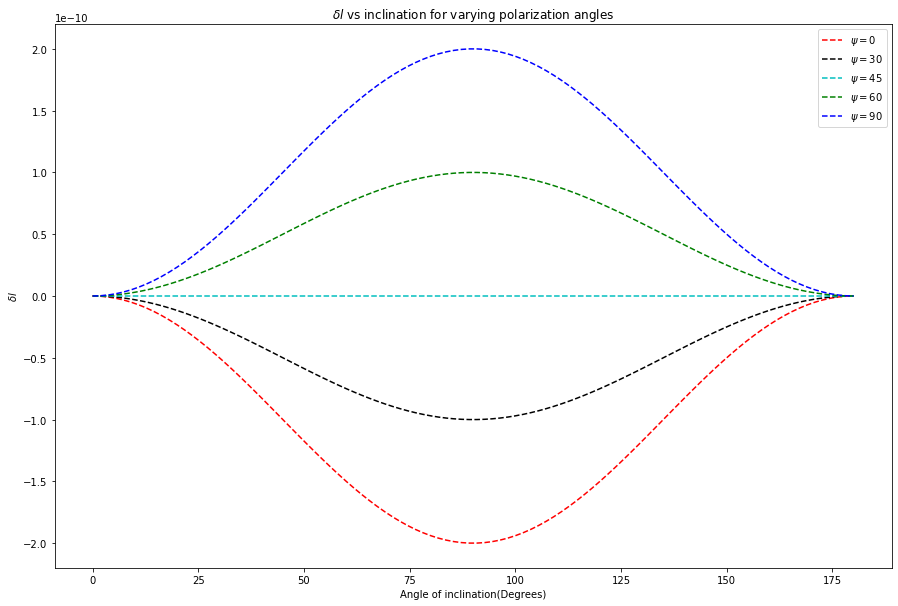

In [103]:
plt.figure(figsize=(15,10))
plt.plot(theta*180/np.pi,response(theta,i,0),"r--",label="$\psi=0$")
plt.plot(theta*180/np.pi,response(theta,i,30*np.pi/180),"k--",label="$\psi=30$")
plt.plot(theta*180/np.pi,response(theta,i,45*np.pi/180),"c--",label="$\psi=45$")
plt.plot(theta*180/np.pi,response(theta,i,60*np.pi/180),"g--",label="$\psi=60$")
plt.plot(theta*180/np.pi,response(theta,i,90*np.pi/180),"b--",label="$\psi=90$")

plt.legend()
plt.xlabel("Angle of inclination(Degrees)")
plt.ylabel("$\delta l$")
plt.title("$\delta l$ vs inclination for varying polarization angles")
plt.savefig("responsevsorientation.pdf")